#### Team Members:

Harshitha Kanta - 50495174  HKANTA

Vineeth Rekha   - 50495819 VREKHA

# Fake News Classification

#### https://www.kaggle.com/datasets/saurabhshahane/fake-news-classification

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

np.random.seed(100)

C:\Users\kanta\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data = pd.read_csv('WELFake_Dataset.csv')
data.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [4]:
data=data.iloc[: , 1:]

In [5]:
data.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [6]:
data.describe()

,label
count,72134.000000
mean,0.514404
std,0.499796
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [7]:
data.shape

(72134, 3)

In [8]:
data.isnull()

,title,text,label
0,False,False,False
1,True,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
72129,False,False,False
72130,False,False,False
72131,False,False,False
72132,False,False,False


In [9]:
data = data.fillna(' ')

In [10]:
data.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [11]:
data.isnull().sum()

title    0
text     0
label    0
dtype: int64

In [12]:
data["content"] = data["title"] + data["text"]

In [13]:
# converts it to lowercase, removes punctuation,remove empty words, 
# joins the remaining words back together 
import re
import string

def preprocess(text):
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    words = text.split()
    words = [word for word in words if len(word.strip()) > 1]
    text = " ".join(words)
    return text

In [14]:
data["content"] = data["content"].apply(preprocess)

In [15]:
# This function lemmatizes each word in the input text, and the output is the lemmatized text where words like "foxes" have been converted to "fox" 
import nltk
from nltk.stem import WordNetLemmatizer
#nltk.download("all")

lemmatizer = WordNetLemmatizer()
def lemmatizing(text):
    stemmed_text = ""
    for word in text.split():
        stem = lemmatizer.lemmatize(word)
        stemmed_text += stem
        stemmed_text += " "
        
    stemmed_text = stemmed_text.strip()
    return stemmed_text

In [16]:
data["content"] = data["content"].apply(lemmatizing)

In [17]:
#Stemming reduces words to their root form, which can help in simplifying the text for various text analysis 
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
def stemming(text):
    stemmed_text = ""
    for word in text.split():
        stem = stemmer.stem(word)
        stemmed_text += stem
        stemmed_text += " "
        
    stemmed_text = stemmed_text.strip()
    return stemmed_text

In [18]:
data["content"] = data["content"].apply(stemming)

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(data["content"], data['label'], test_size=0.35, random_state=42)

In [20]:
# Convert text data to CountVector features
count_vectorizer = CountVectorizer(stop_words='english', max_df=0.9)
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)


In [21]:
count_train.shape

(46887, 289132)

# RandomForest Classifier

In [22]:
## RandomForest Classifier
rf_classifier  = RandomForestClassifier(n_estimators=100,random_state=42)
#print(count_train.shape) 
#print(Y_train)

rf_classifier.fit(count_train, Y_train)

y_pred = rf_classifier.predict(count_test)
accuracy_RandomForest = accuracy_score(Y_test, y_pred)
print("Test Accuracy:", accuracy_RandomForest)

precision_RandomForest = precision_score(Y_test, y_pred)
print("Test precision:", precision_RandomForest)

recall_RandomForest = recall_score(Y_test, y_pred)
print("Test recall:", recall_RandomForest)

f1_RandomForest = f1_score(Y_test, y_pred)
print("Test f1:", f1_RandomForest)

confusion_RandomForest=confusion_matrix(Y_test, y_pred)
print("Test confusion matrix:",confusion_RandomForest)

report_RandomForest = classification_report(Y_test, y_pred)
print("Test Report:", report_RandomForest)

Test Accuracy: 0.9264467065393909
Test precision: 0.9275182368461896
Test recall: 0.9283106796116505
Test f1: 0.9279142890415745
Test confusion matrix: [[11438   934]
 [  923 11952]]
Test Report:               precision    recall  f1-score   support

           0       0.93      0.92      0.92     12372
           1       0.93      0.93      0.93     12875

    accuracy                           0.93     25247
   macro avg       0.93      0.93      0.93     25247
weighted avg       0.93      0.93      0.93     25247



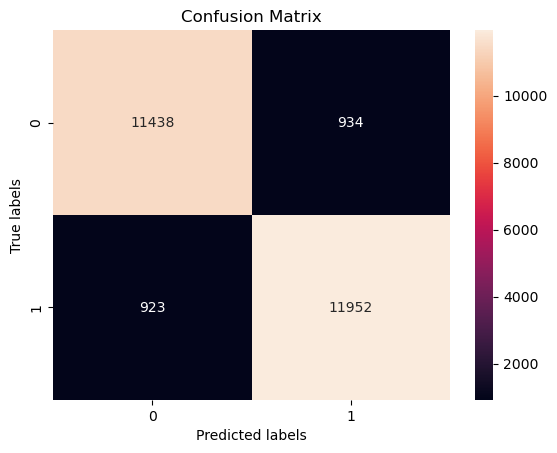

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Plotting
sns.heatmap(confusion_RandomForest, annot=True, fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Linear SVC

cost_range = [0.1]
param_grid = {'C': cost_range}

##Linear SVC
Linear_svc = LinearSVC()
#svm_classifier.fit(count_train, Y_train)


grid_search = GridSearchCV(Linear_svc,param_grid, cv=5)
grid_search.fit(count_train, Y_train)

best_model = grid_search.best_estimator_

#y_pred_train = best_model.predict(count_train)
#predict(count_train)
#accuracy_train = accuracy_score(Y_train, y_pred_train)
#print("Train Accuracy:", accuracy_train)

y_pred_SVC = best_model.predict(count_test)
accuracy_Linear_svc = accuracy_score(Y_test, y_pred_SVC)
print("Test Accuracy:", accuracy_Linear_svc)

precision = precision_score(Y_test, y_pred_SVC)
print("Test precision:", precision)

recall = recall_score(Y_test, y_pred_SVC)
print("Test recall:", recall)

f1 = f1_score(Y_test, y_pred_SVC)
print("Test f1:", f1)


confusion=confusion_matrix(Y_test, y_pred_SVC)
print("Test confusion matrix:",confusion)

report = classification_report(Y_test, y_pred_SVC)
print("Test Report:", report)

##### We are using GridsearchCV to find the best combination of hyperparameters for a model.  we are considering C values as [0.01,0.1,0.25,0.5,1]

In [24]:
##Linear SVC
cost_range = [0.01,0.1,0.25,0.5,1]
param_grid = {'C': cost_range}

Linear_svc =  LinearSVC()


grid_search = GridSearchCV(Linear_svc,param_grid, cv=5)
grid_search.fit(count_train, Y_train)

best_model = grid_search.best_estimator_

# Print the best hyperparameters
print("Best Hyperparameters:", best_model)


#y_pred_train = best_model.predict(count_train)
#predict(count_train)
#accuracy_train = accuracy_score(Y_train, y_pred_train)
#print("Train Accuracy:", accuracy_train)

y_pred_SVC = best_model.predict(count_test)
accuracy_Linear_svc = accuracy_score(Y_test, y_pred_SVC)
print("Test Accuracy:", accuracy_Linear_svc)

precision_Linear_svc = precision_score(Y_test, y_pred_SVC)
print("Test precision:", precision_Linear_svc)

recall_Linear_svc = recall_score(Y_test, y_pred_SVC)
print("Test recall:", recall_Linear_svc)

f1_Linear_svc = f1_score(Y_test, y_pred_SVC)
print("Test f1:", f1_Linear_svc)

confusion_Linear_svc =confusion_matrix(Y_test, y_pred_SVC)
print("Test confusion matrix:",confusion_Linear_svc)

report_Linear_svc = classification_report(Y_test, y_pred_SVC)
print("Test Report:", report_Linear_svc)

C:\Users\kanta\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\kanta\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\kanta\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\kanta\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\kanta\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\kanta\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number 

Best Hyperparameters: LinearSVC(C=0.01)
Test Accuracy: 0.9536578603398423
Test precision: 0.9432033320711851
Test recall: 0.967378640776699
Test f1: 0.9551380368098159
Test confusion matrix: [[11622   750]
 [  420 12455]]
Test Report:               precision    recall  f1-score   support

           0       0.97      0.94      0.95     12372
           1       0.94      0.97      0.96     12875

    accuracy                           0.95     25247
   macro avg       0.95      0.95      0.95     25247
weighted avg       0.95      0.95      0.95     25247



C:\Users\kanta\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


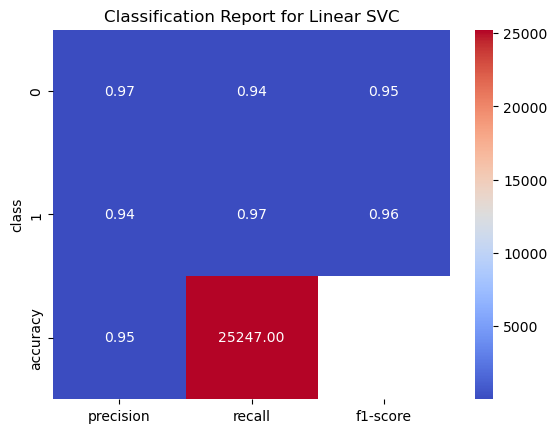

In [25]:
import seaborn as sns


report_str = '''
              precision    recall  f1-score   support
           0       0.97      0.94      0.95     12372
           1       0.94      0.97      0.96     12875
    accuracy                           0.95     25247
   macro avg       0.95      0.95      0.95     25247
weighted avg       0.95      0.95      0.95     25247
'''

# Parsing the string into a list of lists
lines = report_str.strip().split('\n')
data = []
for line in lines[1:]:
    parsed_line = line.split()
    if parsed_line[0].isdigit() or parsed_line[0] in ['accuracy', 'macro avg', 'weighted avg']:
        data.append(parsed_line)

# Create DataFrame
report_df = pd.DataFrame(data, columns=["class", "precision", "recall", "f1-score", "support"]).set_index("class")

# Convert numeric columns
numeric_cols = report_df.columns
report_df[numeric_cols] = report_df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Plotting
sns.heatmap(report_df.iloc[:, :-1], annot=True, cmap='coolwarm', fmt='.2f')  # Excluding 'support' column
plt.title('Classification Report for Linear SVC')
plt.show()

# LogisticRegression

##### We are using GridsearchCV to find the best combination of hyperparameters for a model.  we are considering C values as [0.001, 0.01, 0.1, 1, 10] max_iter as [100, 500, 1000]

In [26]:
##LogisticRegression


scaler = StandardScaler(with_mean=False)
count_train_scaled = scaler.fit_transform(count_train)
count_test_scaled = scaler.transform(count_test)



Logistic_Regression = LogisticRegression()


# Define hyperparameters and their possible values to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10],  # Regularization parameter
    'max_iter': [100, 500, 1000],          # Maximum number of iterations
}

# Create GridSearchCV object
grid_search = GridSearchCV(Logistic_Regression, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(count_train_scaled, Y_train)

# Print the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Retrieve the best model
best_Logistic_Regression = grid_search.best_estimator_



cross_val_scores = cross_val_score(best_Logistic_Regression, count_train_scaled, Y_train, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)
print("Mean CV Accuracy:", cross_val_scores.mean())



y_pred = best_Logistic_Regression.predict(count_test_scaled)


#y_pred_train = logistic_classifier.predict(count_train)
#accuracy_train = accuracy_score(Y_train, y_pred_train)
#print("Train Accuracy:", accuracy_train)

#y_pred = logistic_classifier.predict(count_test)
accuracy_Logistic_Regression = accuracy_score(Y_test, y_pred)
print("Test Accuracy:", accuracy_Logistic_Regression)

precision_Logistic_Regression = precision_score(Y_test, y_pred)
print("Test precision:", precision_Logistic_Regression)

recall_Logistic_Regression = recall_score(Y_test, y_pred)
print("Test recall:", recall_Logistic_Regression)

f1_Logistic_Regression = f1_score(Y_test, y_pred)
print("Test f1:", f1_Logistic_Regression)

confusion_Logistic_Regression =confusion_matrix(Y_test, y_pred)
print("Test confusion matrix:",confusion_Logistic_Regression)

report_Logistic_Regression = classification_report(Y_test, y_pred)
print("Test Report:", report_Logistic_Regression)

C:\Users\kanta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kanta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\kanta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\kanta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Best Hyperparameters: {'C': 0.001, 'max_iter': 100}
Cross-Validation Scores: [0.94817658 0.94924291 0.94689133 0.95062387 0.94593153]
Mean CV Accuracy: 0.9481732447586129
Test Accuracy: 0.9515189923555274
Test precision: 0.9524660194174758
Test recall: 0.9524660194174758
Test f1: 0.9524660194174758
Test confusion matrix: [[11760   612]
 [  612 12263]]
Test Report:               precision    recall  f1-score   support

           0       0.95      0.95      0.95     12372
           1       0.95      0.95      0.95     12875

    accuracy                           0.95     25247
   macro avg       0.95      0.95      0.95     25247
weighted avg       0.95      0.95      0.95     25247



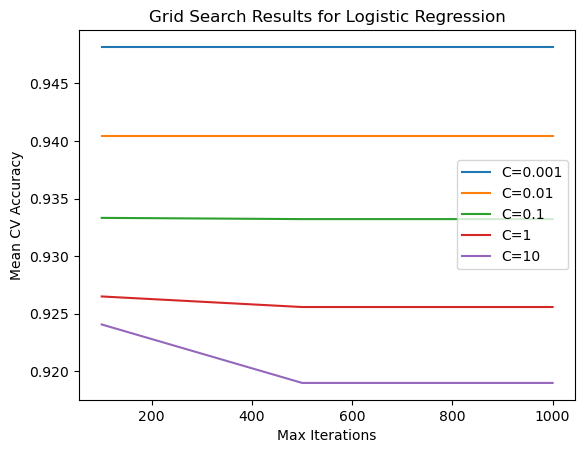

In [27]:
# Convert the grid search results to a DataFrame
results = pd.DataFrame(grid_search.cv_results_)
params = results.params.apply(pd.Series)
results = pd.concat([params, results.mean_test_score], axis=1)

# Plotting
for C_value in param_grid['C']:
    subset = results[results['C'] == C_value]
    plt.plot(subset['max_iter'], subset['mean_test_score'], label=f'C={C_value}')

plt.xlabel('Max Iterations')
plt.ylabel('Mean CV Accuracy')
plt.title('Grid Search Results for Logistic Regression')
plt.legend()
plt.show()

# Neural Networks

###### Activation function is Sigmoid. Loss fucntion is binary_crossentropy

In [31]:
#Tokenizer class to convert text data into sequences of integers. 
#Tokenization is essential because neural networks operate on numerical data, not text. 

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)


max_length = 100  
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length)

# Build the Neural Network
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=100, input_length=max_length))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))  

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  

model.fit(X_train_pad, Y_train, batch_size=32, epochs=10)


loss, accuracy_NN = model.evaluate(X_test_pad, Y_test)
print(f'Test Accuracy: {accuracy_NN}')



Epoch 1/10
1466/1466 [==============================] - 136s 91ms/step - loss: 0.2420 - accuracy: 0.9022
Epoch 2/10
1466/1466 [==============================] - 126s 86ms/step - loss: 0.1516 - accuracy: 0.9428
Epoch 3/10
1466/1466 [==============================] - 120s 82ms/step - loss: 0.1146 - accuracy: 0.9581
Epoch 4/10
1466/1466 [==============================] - 119s 81ms/step - loss: 0.0906 - accuracy: 0.9670
Epoch 5/10
1466/1466 [==============================] - 133s 91ms/step - loss: 0.0676 - accuracy: 0.9763
Epoch 6/10
1466/1466 [==============================] - 123s 84ms/step - loss: 0.0453 - accuracy: 0.9851
Epoch 7/10
1466/1466 [==============================] - 126s 86ms/step - loss: 0.0376 - accuracy: 0.9877
Epoch 8/10
1466/1466 [==============================] - 125s 85ms/step - loss: 0.0299 - accuracy: 0.9903
Epoch 9/10
1466/1466 [==============================] - 179s 122ms/step - loss: 0.0208 - accuracy: 0.9937
Epoch 10/10
789/789 [==============================] -

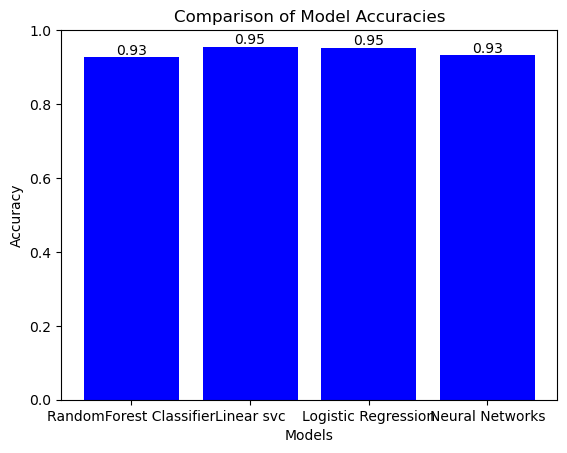

In [32]:
model_names = ['RandomForest Classifier', 'Linear svc', 'Logistic Regression', 'Neural Networks']
accuracies = [accuracy_RandomForest,accuracy_Linear_svc, accuracy_Logistic_Regression, accuracy_NN]  # Example accuracies


import matplotlib.pyplot as plt

plt.bar(model_names, accuracies, color='blue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracies')
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
for i in range(len(accuracies)):
    plt.text(i, accuracies[i], f'{accuracies[i]:.2f}', ha = 'center', va = 'bottom')

plt.show()


In [33]:
print("accuracy_RandomForest : ",accuracy_RandomForest)
print("accuracy_Linear_svc : ",accuracy_Linear_svc)
print("accuracy_Logistic_Regression : ",accuracy_Logistic_Regression)
print("accuracy_NN : ",accuracy_NN)

accuracy_RandomForest :  0.9264467065393909
accuracy_Linear_svc :  0.9536578603398423
accuracy_Logistic_Regression :  0.9515189923555274
accuracy_NN :  0.9313581585884094


# For this dataset Linear SVC and logistic regression is giving better results compared to Neural networks and random forest classification

###### Reference :
some codes are taken from the refereance notes of professor Sreyasee Das Bhattacharjee